In [ ]:
# default_exp demassey

# Code for the Demassey instances (Multi-Activity Shift Scheduling)

This notebook contains code for the Demassey instances that were introduced in:
- Demassey, Sophie, Gilles Pesant, and Louis-Martin Rousseau. 2005. Constraint Programming Based Column Generation for Employee Timetabling. In Integration of AI and OR Techniques in Constraint Programming for Combinatorial Optimization Problems, ed. Roman Barták and Michela Milano, 140–154. Lecture Notes in Computer Science. Berlin, Heidelberg: Springer. https://doi.org/10.1007/11493853_12.

They are used in many other publications, as well.

This notebook provides the following functionality:
- an instance object (at the moment definded as Python `Box`, we may later move to a proper class) with reading functionality
- a RuleSet object

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export

import os

import numpy as np

from personnel_scheduling.data_structures import *
from personnel_scheduling.reporting import *

from collections import namedtuple

from box import Box
from dataclasses import dataclass, field

## Instance class


In [ ]:
#export


class DemasseyInstance():
        
    def __init__(self, filename):
        
        self.instance_name = filename[filename.rfind('/')+1:-4]        
        
        with open(filename) as f:
            self.number_of_periods = int(f.readline())
            self.max_work_periods_per_shift = int(f.readline())
            self.number_of_days_in_horizon = int(f.readline())
            self.is_continous = int(f.readline())
            self.instance_version = int(f.readline())
            self.meaningless_parameter = int(f.readline())
            self.number_of_employees =int(f.readline()[5:])
            self.skills = ([int(n) for n in f.readline()[:-1].split()])
            self.number_of_activities = int(f.readline()[4:])
            
            line_ints = [int(n) for n in f.readline()[:-1].split()]
        
            self.min_cons_periods = line_ints[0]
            self.max_cons_periods = line_ints[1]
            self.cost_per_activity_assignment = line_ints[2]
 
            self.activity_data = []
     
            for act in range(self.number_of_activities):
                self.activity_data.append( Box() )
                self.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
                self.activity_data[act].over_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
                self.activity_data[act].under_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
                self.activity_data[act].demand_2 = ([int(n) for n in f.readline()[:-1].split()])
                f.readline()

                
    def get_aggregated_demand_per_period(self):
        demand_per_period = []
        for p in range(self.number_of_periods):
            demand = 0
            for act in range(self.number_of_activities):
                demand = demand + self.activity_data[act].demand[p]

            demand_per_period.append(demand)

        return demand_per_period

    def get_activity_demands_per_period(self):
        demands = []

        for activity in range(self.number_of_activities):
            demands.append(self.activity_data[activity].demand)

        return demands

        
    def get_average_work_hours(self):
        return (np.sum(self.get_aggregated_demand_per_period()) / self.number_of_employees) / 4
        
    def get_instance_information(self):
        return f'Info: Activities: {self.number_of_activities}, Employees: {self.number_of_employees}, ⌀ Workhours: {self.get_average_work_hours():.02f}'   
        

In [ ]:
## This is some old code, right now just kept for reference

## read instance
def read_instance(filename):

    
    with open(filename) as f:
        instance =  Box({'number_of_periods' : int(f.readline()), \
                         'max_work_periods_per_shift' : int(f.readline()), \
                         'number_of_days_in_horizon' : int(f.readline()), \
                         'is_continous' : int(f.readline()), \
                         'instance_version' : int(f.readline()), \
                         'meaningless_parameter' : int(f.readline()), \
                         'number_of_employees' : int(f.readline()[5:]), \
                         'skills' : ([int(n) for n in f.readline()[:-1].split()]), \
                         'number_of_activities' : int(f.readline()[4:])
        })

      
        line_ints = [int(n) for n in f.readline()[:-1].split()]
        
        instance.min_cons_periods = line_ints[0]
        instance.max_cons_periods = line_ints[1]
        instance.cost_per_activity_assignment = line_ints[2]
 
        instance.activity_data = []
        for act in range(instance.number_of_activities):
            instance.activity_data.append( Box())
            instance.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].over_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].under_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].demand_2 = ([int(n) for n in f.readline()[:-1].split()])
            f.readline()
        return instance

    def read_instance_demassey_new(filename):
        with open(filename) as f:
            instance =  Box({'number_of_periods' : 96, \
                             'max_work_periods_per_shift' : 32, \
                             'number_of_days_in_horizon' : 1, \
                             'is_continous' : 1, \
                             'instance_version' : 1, \
                             'meaningless_parameter' : 1, \
                             'number_of_employees' : int(f.readline()[5:]), \
                             'skills' : ([int(n) for n in f.readline()[:-1].split()]), \
                             'number_of_activities' : int(f.readline()[4:])
            })


            line_ints = [int(n) for n in f.readline()[:-1].split()]

            instance.min_cons_periods = line_ints[0]
            instance.max_cons_periods = line_ints[1]
            instance.cost_per_activity_assignment = line_ints[2]

            instance.activity_data = []
            for act in range(instance.number_of_activities):
                instance.activity_data.append( Box())
                instance.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
                instance.activity_data[act].over_covering_cost = ([20 for n in range(96)])
                instance.activity_data[act].under_covering_cost = ([100 for n in range(96)])
                f.readline()
            return instance



## Instance: shoe_1_3_1_9

Info: Activities: 3, Employees: 6, ⌀ Workhours: 6.33

## Demand:

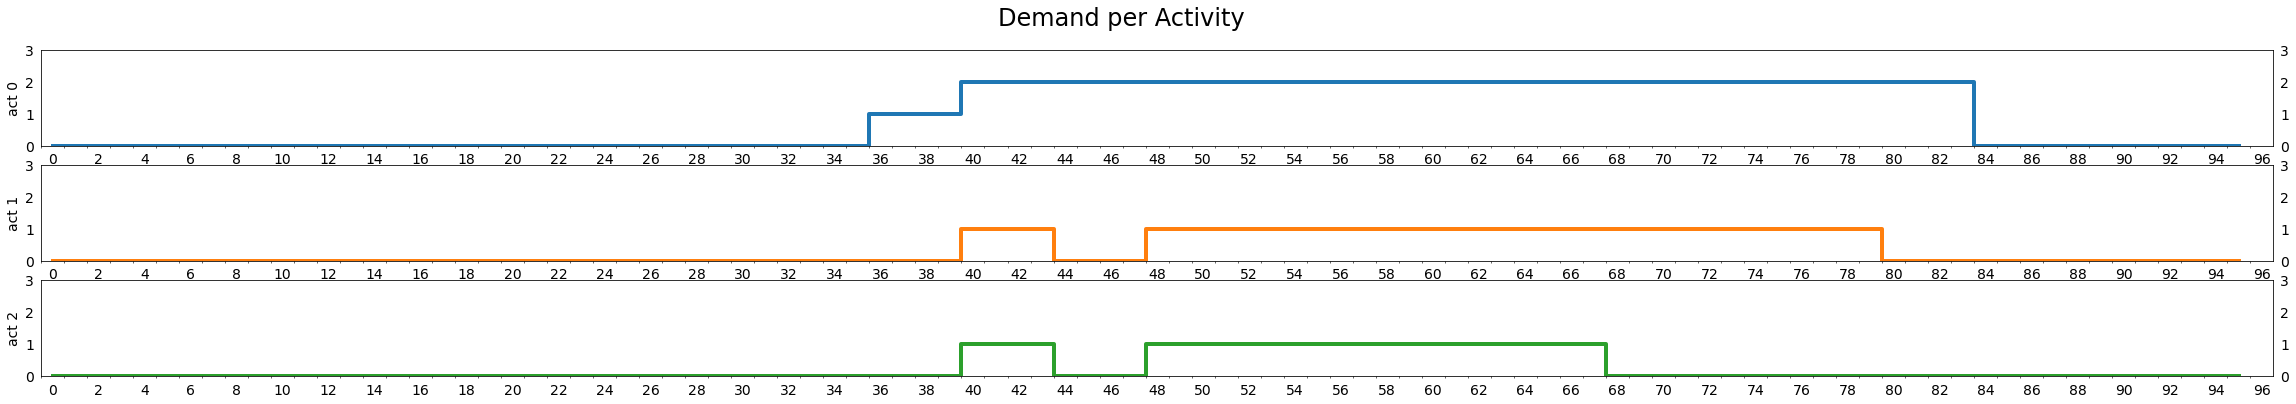

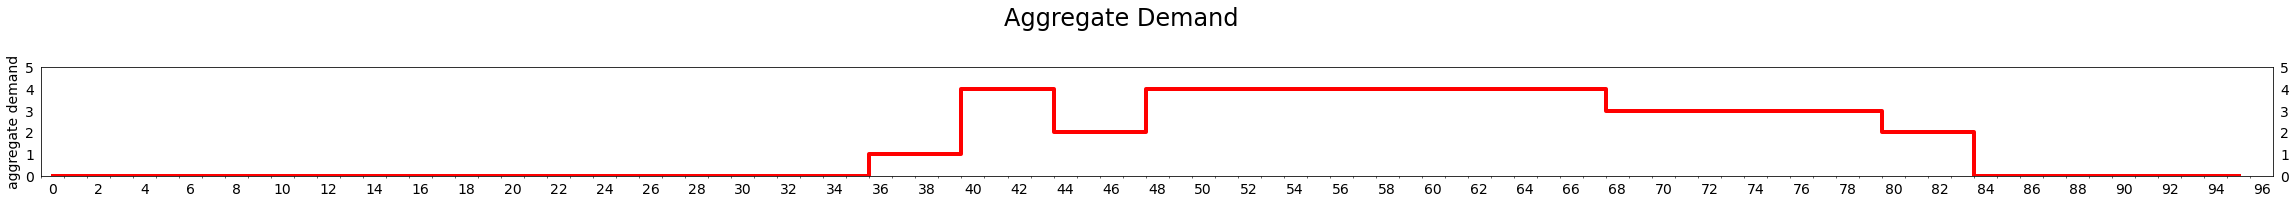

In [ ]:
#instance = read_instance("./instances/demassey/shoe_1_3_1_9.txt")

instance = DemasseyInstance("./instances/demassey/shoe_1_3_1_9.txt")

instance_report(instance)

## Rule Set

The following rules need to hold (only relevant rules, as summarized in the Cote paper.

3. A shift must cover between three hours and eight hours of work activities.

*Observe:* The minimum of three hours implicitly holds due to a combination of ruules 4,5 and 6

4. If a shift covers at least six hours of work activities, it must have two 15-minute breaks and a lunch break of one hour.

5. If a shift covers less than six hours of work activ-
ities, it must have one 15-minute break, but no lunch.

6. If performed, the duration of a work activity is
at least one hour (four consecutive periods).

7. A break (or lunch) is necessary between two dif-
ferent work activities.

8. Work activities must be inserted between breaks,
lunch, and rest stretches.

9. For each period of the planning horizon, labor
requirements for every work activity are available.
10. Overcovering and undercovering are allowed.
Costs are associated with overcovering and undercov-
ering the requirements of a work activity at a given
period.

11. The cost of a shift is the sum over every period
of the costs of all work activities performed in the
shift.

In [ ]:
#export


class RuleSet:
    
    def __init__(self, instance):
        self.instance = instance
    
    def check_activity_block_rules(self, activity_block):
        
        evaluation_result = RuleEvaluationResult()
        
        number_of_periods = activity_block.get_number_of_periods()
        
        

        # if it is a work block: minimum activity
        if activity_block.is_work():
            
            evaluation_result.add_penalty('ActivityCostPerPeriod', activity_block.get_number_of_work_periods() * self.instance.cost_per_activity_assignment )

            
            if number_of_periods < self.instance.min_cons_periods:
                evaluation_result.add_hard_rule_violation('MinConsPeriodsActivity')
                
            elif number_of_periods > self.instance.max_cons_periods:
                evaluation_result.add_hard_rule_violation('MaxConsPeriodsActivity')
        else:
            if number_of_periods not in [1, 4]:
                evaluation_result.add_hard_rule_violation('EitherShortOrLunchBreak')

            
        return evaluation_result
        
    def check_work_block_rules(self, work_block, shift_index = -1):
        # between two different activities we need a break
        
        evaluation_result = RuleEvaluationResult()
        
        prev_block = work_block.activity_blocks[0]
        
        for block in work_block.activity_blocks[1:]:
            if prev_block.activity_type != block.activity_type:
                return evaluation_result.add_hard_rule_violation('BreakBetweenActivitiesNeeded')
            
            prev_block = block
        
        return evaluation_result
    
    def check_shift_rules(self, shift, shift_index = -1):  
        # for this type of problem, we need to ensure that
                    
        # 1. between two different activities we need a break
        # 2. between two breaks, there needs to be work.
        
        evaluation_result = RuleEvaluationResult()
        
        short_breaks = []
        lunch_breaks = []
        
    
        hard_rule_violations = []
                
        prev_block = shift.work_and_break_blocks[0]    
        number_of_work_periods = prev_block.get_number_of_work_periods()
        
        for block in shift.work_and_break_blocks[1:]:
            if prev_block.is_work() == block.is_work():
                evaluation_result.add_hard_rule_violation('BreakAndWorkBlocksNeedToAlternate')
            
            #oberve: given the activity block checks, we know that we can only have 1 and 4 period-breaks
            if not block.is_work():
                if block.get_number_of_break_periods() == 1:
                    short_breaks.append(block)
                else:
                    lunch_breaks.append(block)
               
         
            number_of_work_periods += block.get_number_of_work_periods()
            
            prev_block = block
            
        # now check:
        if number_of_work_periods < 6*4:
            if not (len(short_breaks)==1 and len(lunch_breaks) == 0):
                evaluation_result.add_hard_rule_violation('OneShortBreakOnlyInShortShift')
        elif number_of_work_periods <= self.instance.max_work_periods_per_shift:                
            if not (len(short_breaks)==2 and len(lunch_breaks) == 1):
                    evaluation_result.add_hard_rule_violation('TwoShortBreakAndOneLunchInLongShift')
        else:
            evaluation_result.add_hard_rule_violation('MaxWorkPeriodsPerShift')
        
        return evaluation_result
    
    
    def check_demand_coverage(self, p, activity, covered_demand):
        evaluation_result = RuleEvaluationResult()
        
        difference = covered_demand - self.instance.activity_data[activity].demand[p]
        
        
        if difference > 0: ## over-covering
             evaluation_result.add_penalty('OverCovering',difference * self.instance.activity_data[activity].over_covering_cost[p])
        elif difference < 0:
            evaluation_result.add_penalty('UnderCovering',(-1)*difference * self.instance.activity_data[activity].under_covering_cost[p])
        
        return evaluation_result

        
    

Let us try by reading a solution from a file:

In [ ]:

rule_set = RuleSet(instance)

shift_schedule = ShiftSchedule.from_file("test_data/shoe_1_3_1_9_sol.csv")

evaluation_result = evaluate_shift_schedule(shift_schedule, rule_set)

display_evaluation_results(evaluation_result)


### Feasible Solution with objective: 2450

### Grouped Penalties:

rule,penalty
ActivityCostPerPeriod,2250
UnderCovering,200


### The full solution report

## Instance: shoe_1_3_1_9

Info: Activities: 3, Employees: 6, ⌀ Workhours: 6.33

### Feasible Solution with objective: 2450

### Grouped Penalties:

rule,penalty
ActivityCostPerPeriod,2250
UnderCovering,200


## Shift Schedule:

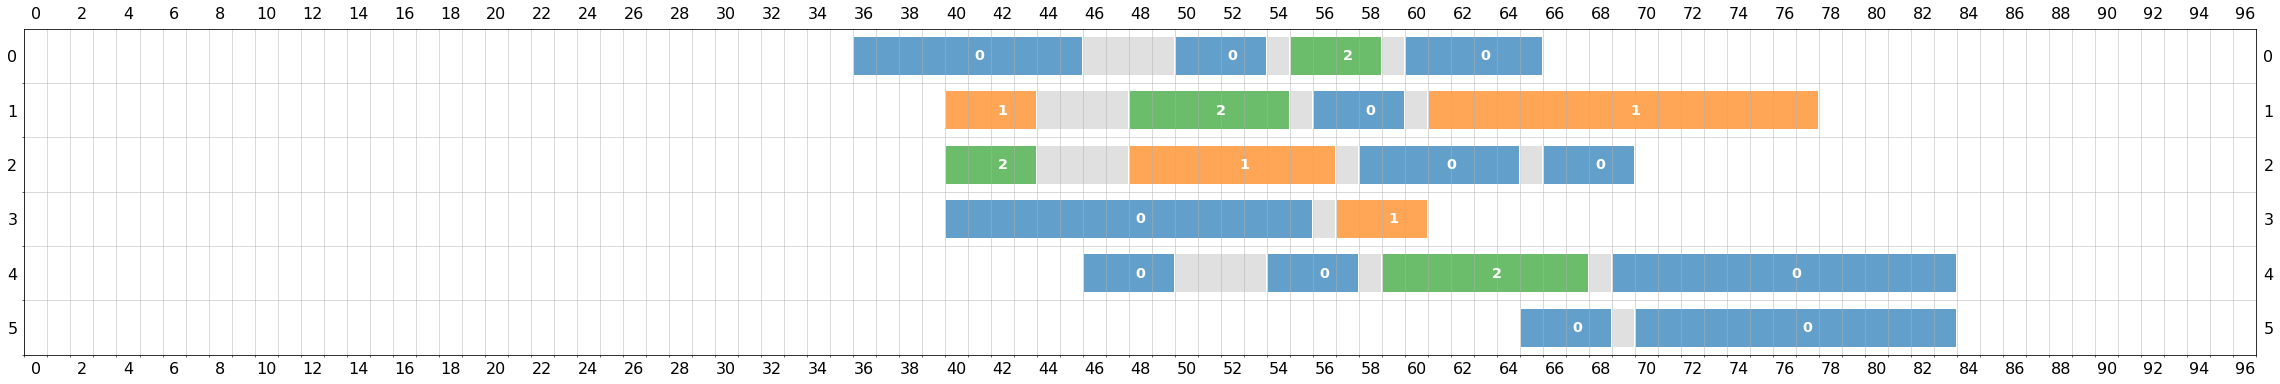

## Demands and Cover

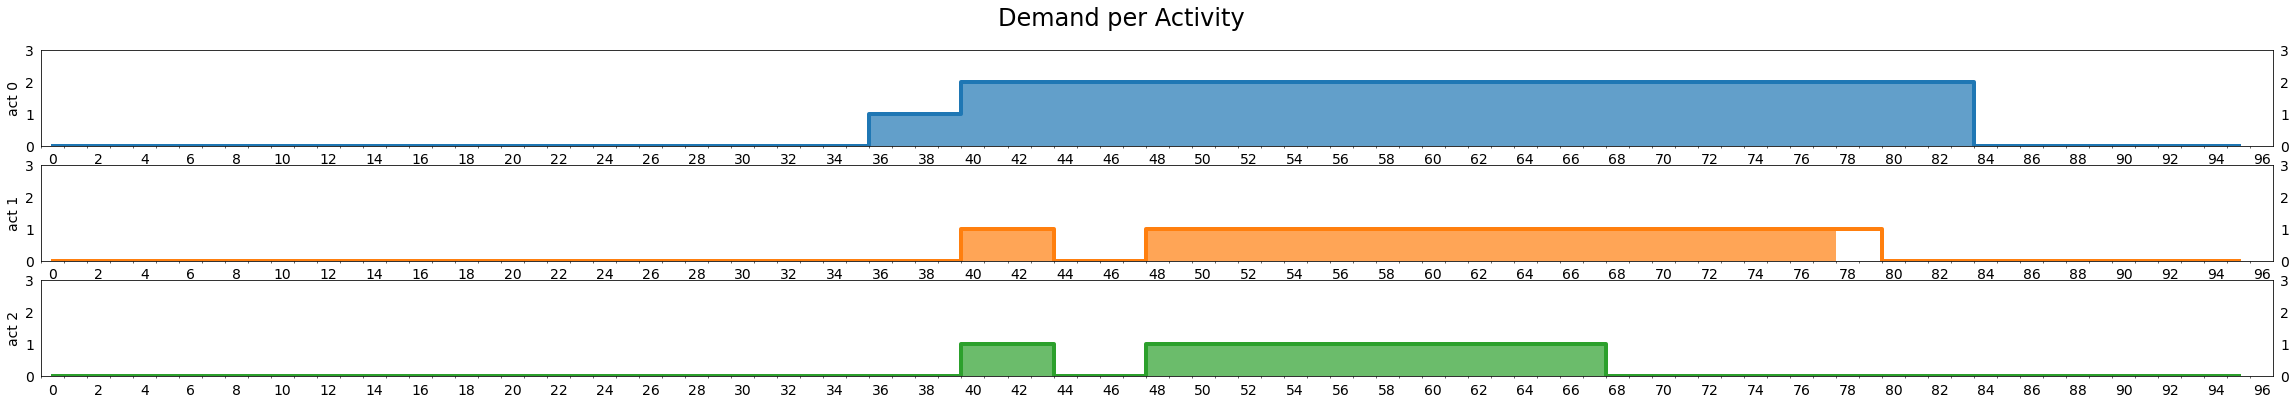

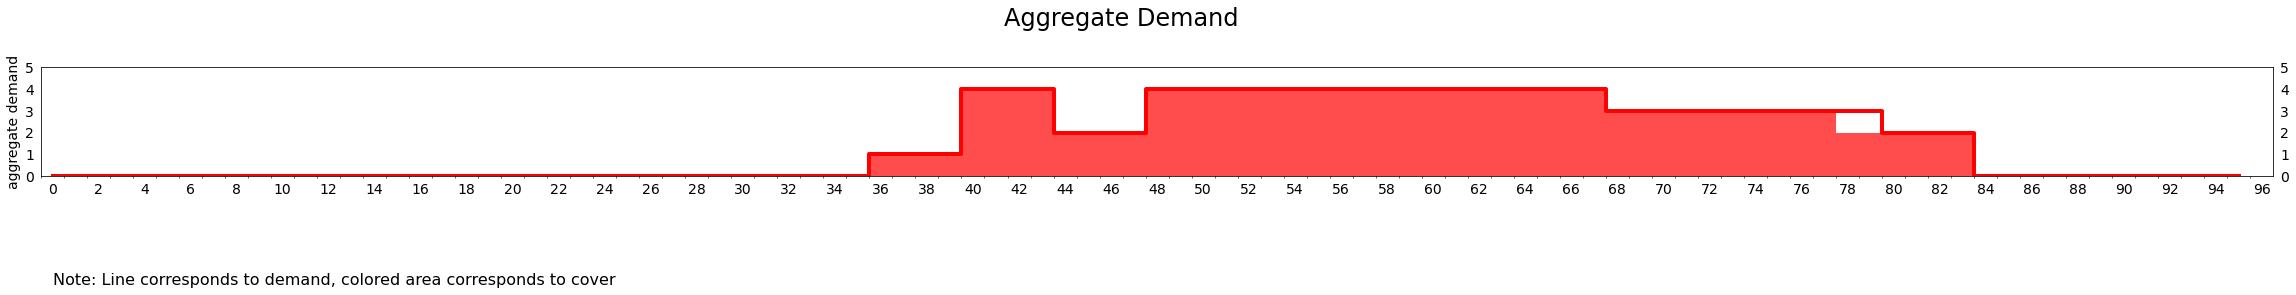

In [ ]:
instance_solution_report(instance, rule_set, shift_schedule)

## Exporting

In [ ]:


#hide
from nbdev.export import *
notebook2script()



Converted 00_data_stuctures.ipynb.
Converted 00_reporting.ipynb.
Converted 01_demassey.ipynb.
Converted 02_dahmen.ipynb.
Converted index.ipynb.
